# Problem:

You work as a data scientist at a credit card company. A senior VP is leading an effort to reduce costs associated with signup incentives by offering credit cards with carefully targeted benefits that will attract new cardholders. As a first step, she would like you to examine cardholder data collected over the last 6 months in order to understand the various kinds of users who use the company’s products. She is especially interested in getting an idea of which benefits to associate with each new card offering. 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
cc_df = pd.read_csv('cc_info.csv')
cc_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
print('size of data set:',cc_df.shape)

size of data set: (8950, 18)


## Let's start with data cleaning

In [4]:
# one row of 'CREDIT_LIMIT' is NA
cc_df[cc_df['CREDIT_LIMIT'].isnull()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [5]:
# drop off NA in 'CREDIT_LIMIT'
cc_df.dropna(subset=['CREDIT_LIMIT'],inplace = True)

In [6]:
# a lot of NAs in 'MINIMUM_PAYMENTS', fill it to 0
cc_df.fillna(0,inplace = True)

In [7]:
cc_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Data exploration

In [8]:
# plot the histogram graphs of all columns except "CUST_ID" and "TENURE"
column_names = cc_df.columns.values.tolist()
column_plot = column_names[1:-1]

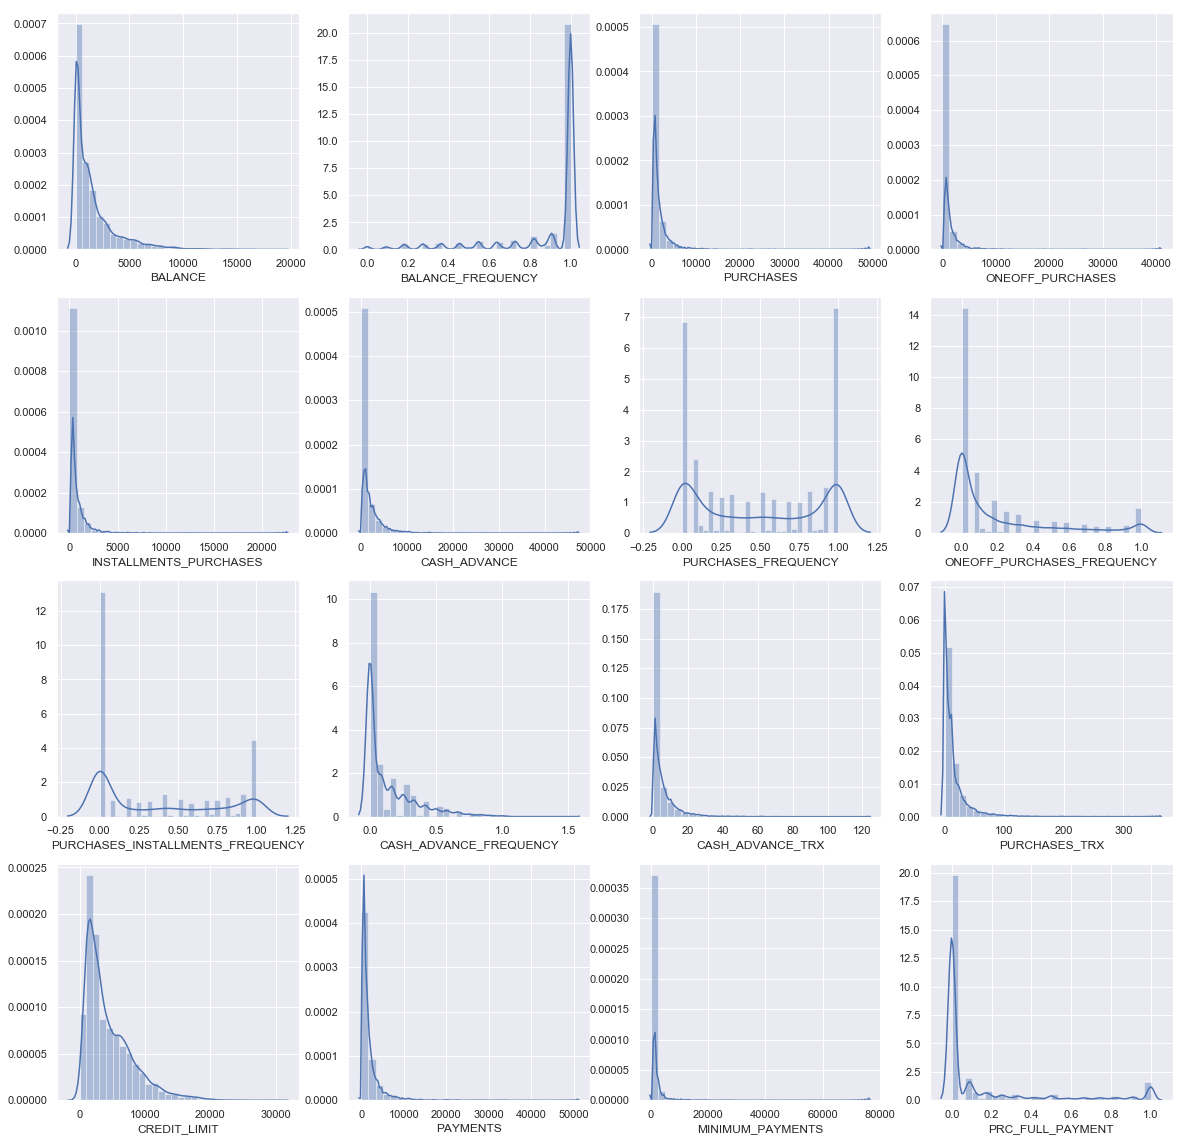

In [38]:
f, axes = plt.subplots(4, 4, figsize=(20, 20))
inx = 0;
for i in range(0,4):
    for j in range(0,4):
        sns.set(font_scale=1)
        sns.distplot(cc_df[column_plot[inx]],bins=30,kde=True,ax=axes[i, j])
        inx = inx + 1

## Data preprocessing; normalization

In [10]:
df_raw = cc_df.drop(['CUST_ID'], axis=1)
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
robust_scaled = scaler.fit_transform(df_raw)
robust_scaled_df = pd.DataFrame(robust_scaled,columns=column_names[1::])

In [11]:
robust_scaled_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.432387,-1.636364,-0.248596,-0.065763,0.013656,0.000000,-0.399999,-0.277777,-0.111112,0.000000,0.00,-0.3125,-0.408163,-0.431661,-0.240018,0.000000,0.0
1,1.209127,-0.818182,-0.337724,-0.065763,-0.189907,5.784296,-0.600000,-0.277777,-0.222223,1.125001,1.00,-0.4375,0.816327,2.138325,1.250860,1.555556,0.0
2,0.841881,0.000000,0.384615,1.272295,-0.189907,0.000000,0.600000,3.055557,-0.222223,0.000000,0.00,0.3125,0.918367,-0.154807,0.539559,0.000000,0.0
3,0.411728,-3.272727,1.062726,2.528425,-0.189907,0.184751,-0.500000,0.000000,-0.222223,0.374999,0.25,-0.3750,0.918367,-0.564601,-0.462986,0.000000,0.0
4,-0.029058,0.000000,-0.322776,-0.038073,-0.189907,0.000000,-0.500000,0.000000,-0.222223,0.000000,0.00,-0.3750,-0.367347,-0.117739,-0.071754,0.000000,0.0


## check the feature correlations

[Text(0.5, 0, 'BALANCE'),
 Text(1.5, 0, 'BALANCE_FREQUENCY'),
 Text(2.5, 0, 'PURCHASES'),
 Text(3.5, 0, 'ONEOFF_PURCHASES'),
 Text(4.5, 0, 'INSTALLMENTS_PURCHASES'),
 Text(5.5, 0, 'CASH_ADVANCE'),
 Text(6.5, 0, 'PURCHASES_FREQUENCY'),
 Text(7.5, 0, 'ONEOFF_PURCHASES_FREQUENCY'),
 Text(8.5, 0, 'PURCHASES_INSTALLMENTS_FREQUENCY'),
 Text(9.5, 0, 'CASH_ADVANCE_FREQUENCY'),
 Text(10.5, 0, 'CASH_ADVANCE_TRX'),
 Text(11.5, 0, 'PURCHASES_TRX'),
 Text(12.5, 0, 'CREDIT_LIMIT'),
 Text(13.5, 0, 'PAYMENTS'),
 Text(14.5, 0, 'MINIMUM_PAYMENTS'),
 Text(15.5, 0, 'PRC_FULL_PAYMENT'),
 Text(16.5, 0, 'TENURE')]

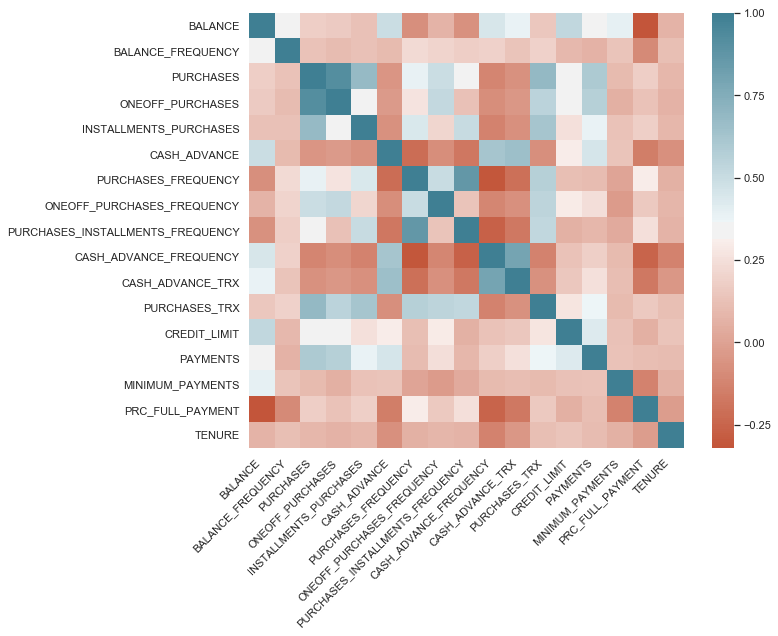

In [12]:
corr = robust_scaled_df.corr()

plt.figure(figsize=(10, 8))
cmap=sns.diverging_palette(20, 220, n=200)
    
ax = sns.heatmap(corr,cmap=cmap,square=True)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [13]:
# PCA dimension reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
robust_scaled_pca = pca.fit_transform(robust_scaled)  
print('explained_variance_ratio:',pca.explained_variance_ratio_)  
print('sum of explained variance ratio:',pca.explained_variance_ratio_.sum())  

explained_variance_ratio: [0.30298201 0.24337013 0.12355773 0.08042351 0.06992225 0.05364528
 0.03270672 0.02630941 0.02023051 0.0149193 ]
sum of explained variance ratio: 0.9680668505044925


I decide to reduce the dimension to 10, such that sum of explained variance is 0.968

## Try user segmentation using hierarchy clustering

In [14]:
# first let's define a function to plot distribution 

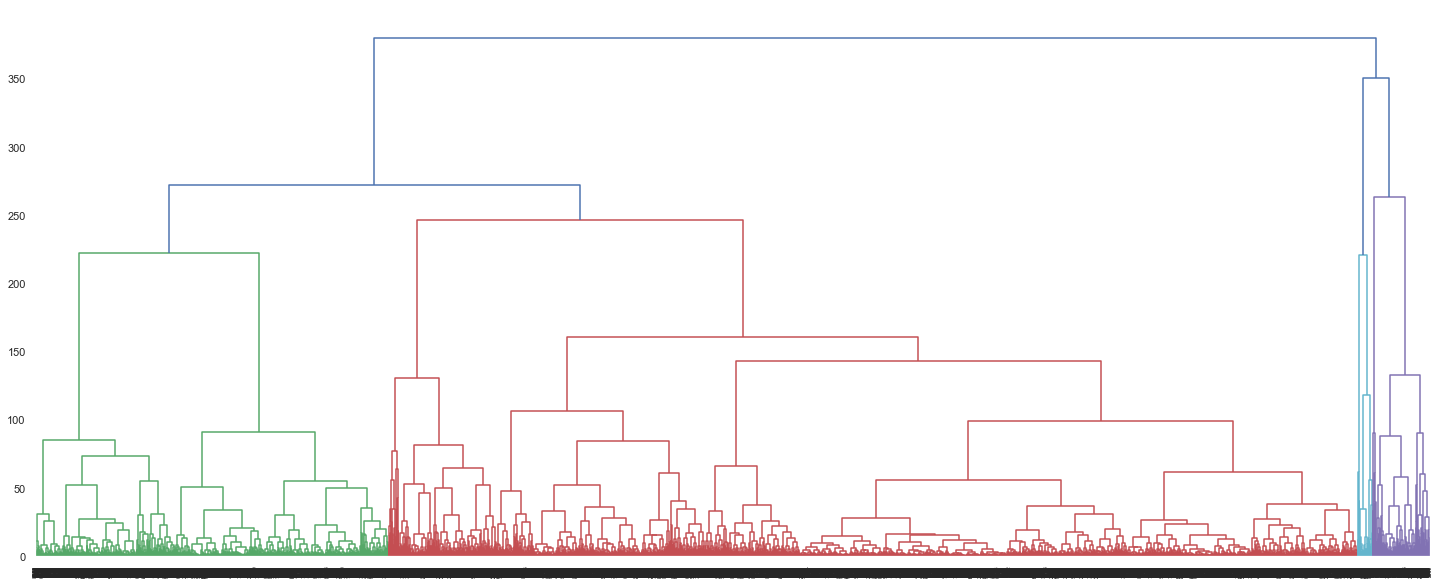

In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(robust_scaled_pca, 'ward')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)



In [16]:
from sklearn.cluster import AgglomerativeClustering

# cluster the data into 6 clusters
agg_clustering = AgglomerativeClustering(n_clusters=6,linkage='ward').fit(robust_scaled)
agg_clustering.labels_

array([1, 0, 0, ..., 0, 0, 0])

In [17]:
# check the total number in each cluster
pd.Series(agg_clustering.labels_).value_counts()

0    5556
1    2387
4     879
2     101
3      19
5       7
dtype: int64

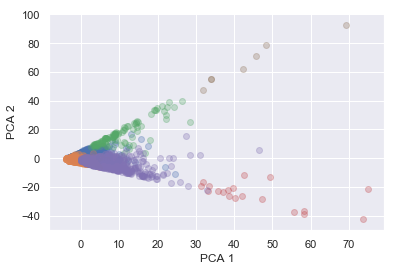

In [18]:
# plot the clusterring result using PCA 1 and PCA 2
for cluster_label in range(0,6):
    cluster_list = (agg_clustering.labels_== cluster_label)
    plt.scatter(robust_scaled_pca[cluster_list,0], robust_scaled_pca[cluster_list,1],alpha=.3)
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')

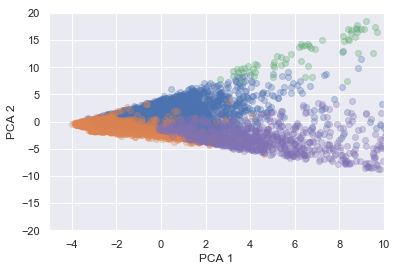

In [19]:
# zoom in
for cluster_label in range(0,6):
    cluster_list = (agg_clustering.labels_== cluster_label)
    plt.scatter(robust_scaled_pca[cluster_list,0], robust_scaled_pca[cluster_list,1], alpha=.3)
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.xlim((-5,10))
    plt.ylim((-20,20))

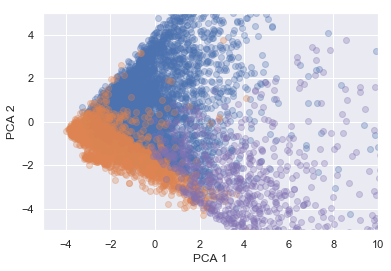

In [20]:
# zoom in
for cluster_label in range(0,6):
    cluster_list = (agg_clustering.labels_== cluster_label)
    plt.scatter(robust_scaled_pca[cluster_list,0], robust_scaled_pca[cluster_list,1], alpha=.3)
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.xlim((-5,10))
    plt.ylim((-5,5))

In [34]:
# look at the outlier?
cluster = 5
index = np.where(agg_clustering.labels_==cluster)
cc_df.iloc[index]


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
567,C10591,3457.086184,1.0,2448.60,0.0,2448.60,0.000000,1.0,0.0,1.0,0.000000,0,12,1700.0,227.514473,38512.12477,0.0,12
4376,C14499,10571.411070,1.0,7739.48,0.0,7739.48,0.000000,1.0,0.0,1.0,0.000000,0,44,8000.0,2688.447014,76406.20752,0.0,12
4462,C14586,4976.028578,1.0,900.87,0.0,900.87,0.000000,1.0,0.0,1.0,0.000000,0,162,5500.0,92.865469,50260.75947,0.0,12
5657,C15815,4628.109931,1.0,912.54,0.0,912.54,0.000000,1.0,0.0,1.0,0.000000,0,21,5000.0,3746.305759,56370.04117,0.0,12
5830,C15993,8038.893195,1.0,0.00,0.0,0.00,197.915586,0.0,0.0,0.0,0.166667,8,0,9000.0,3569.182969,43132.72823,0.0,12
5968,C16134,6022.224462,1.0,0.00,0.0,0.00,4111.465632,0.0,0.0,0.0,0.166667,6,0,7000.0,4560.775720,42629.55117,0.0,12
7132,C17325,9024.812044,1.0,0.00,0.0,0.00,2750.442399,0.0,0.0,0.0,0.083333,2,0,9000.0,302.484224,61031.61860,0.0,12


This cluster has huge minumum payments. Error?

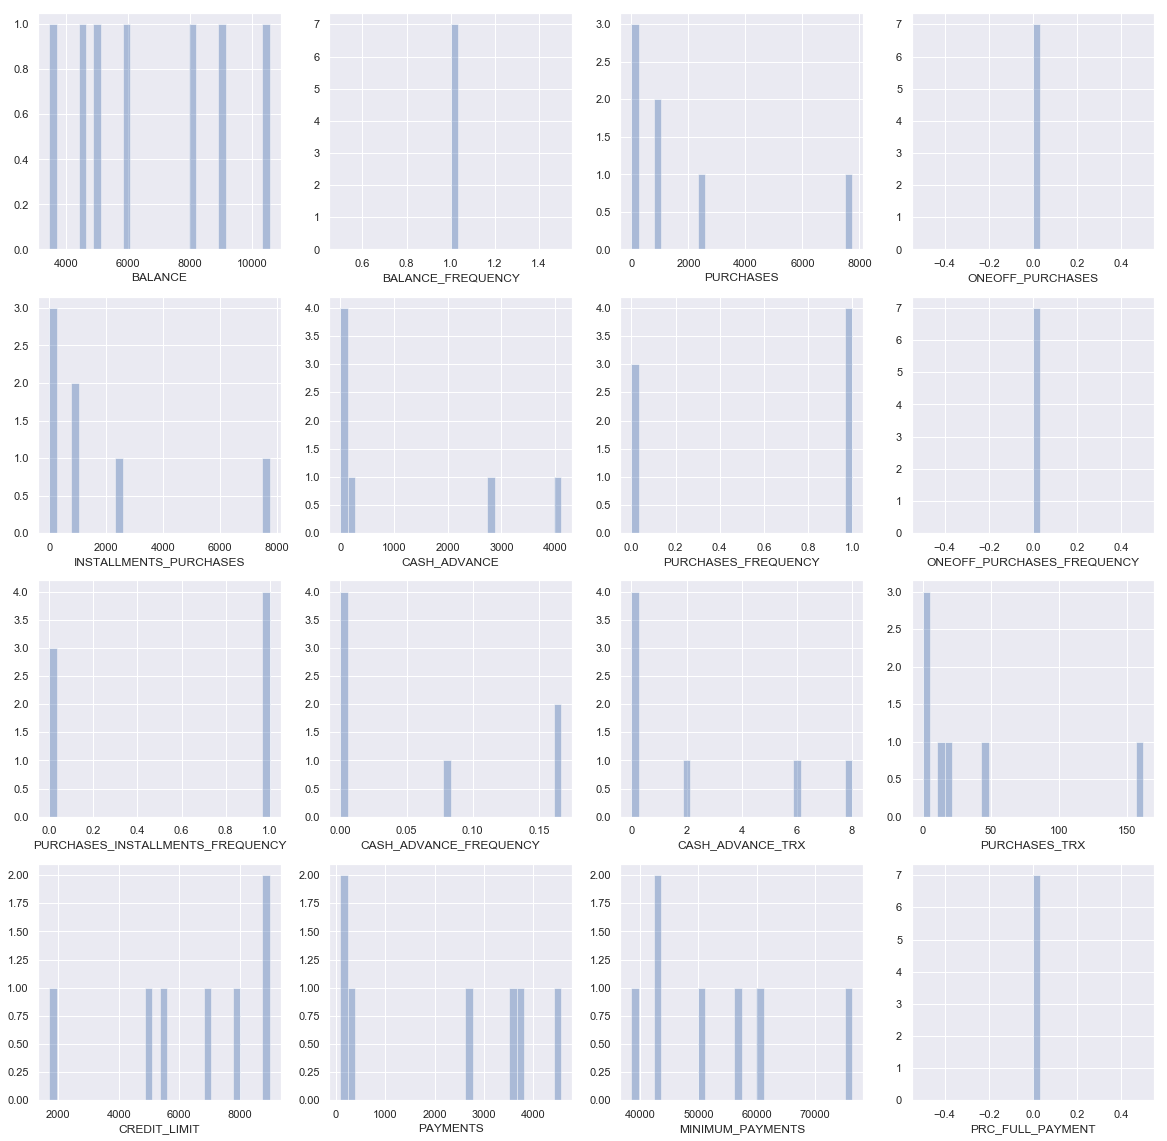

In [35]:
# visualization
f, axes = plt.subplots(4, 4, figsize=(20, 20))
inx = 0;
for i in range(0,4):
    for j in range(0,4):
        sns.set(font_scale=1)
        sns.distplot(cc_df.iloc[index][column_plot[inx]],kde=False,bins=30,ax=axes[i, j])
        inx = inx + 1

In [23]:
cluster = 3
index = np.where(agg_clustering.labels_==cluster)
cc_df.iloc[index].shape

(19, 18)

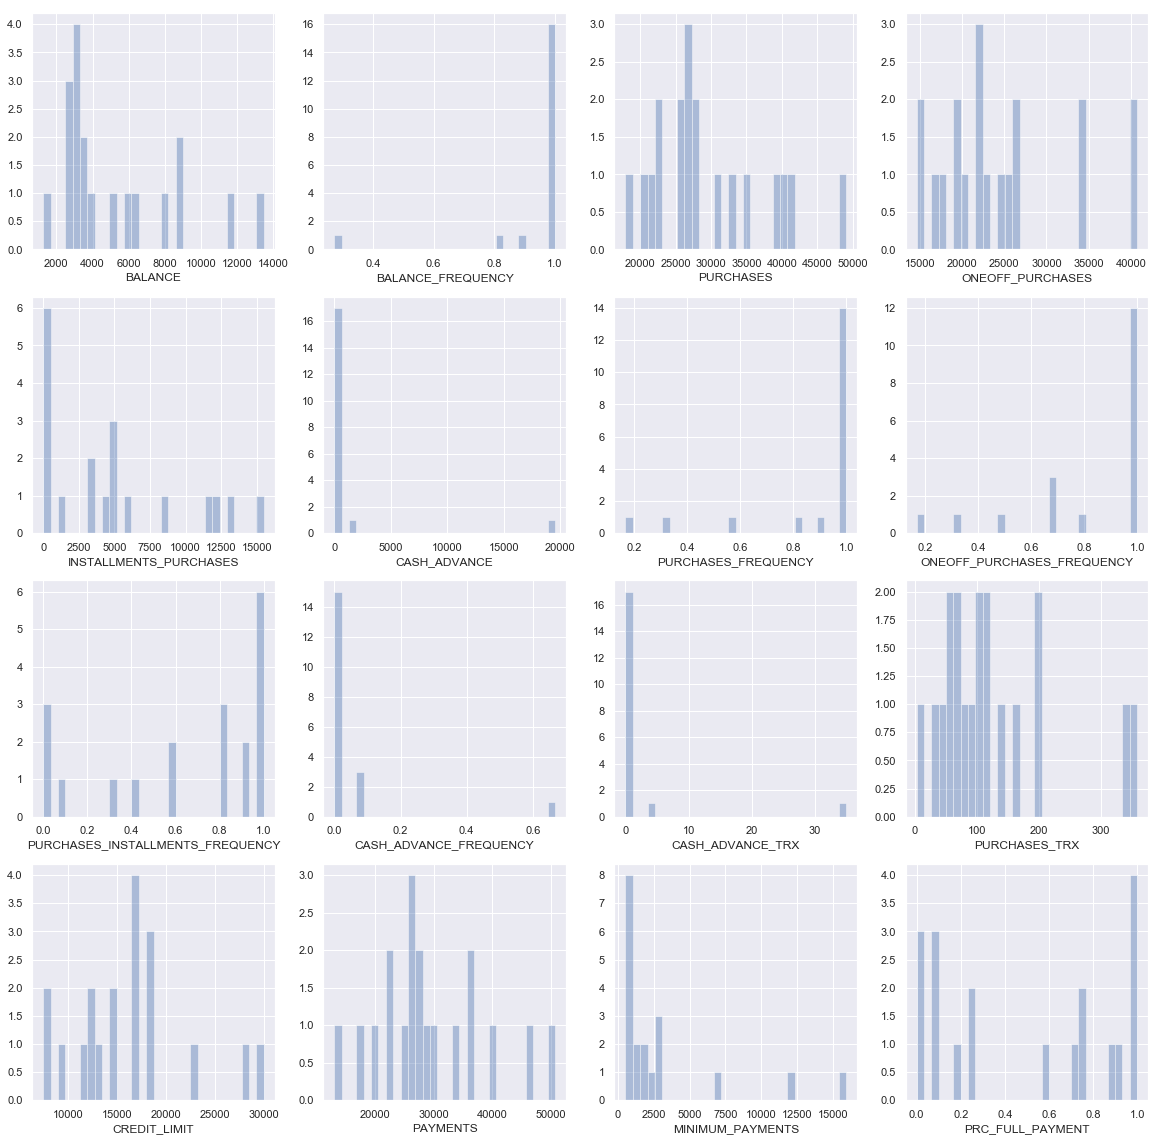

In [24]:
f, axes = plt.subplots(4, 4, figsize=(20, 20))
inx = 0;
for i in range(0,4):
    for j in range(0,4):
        sns.set(font_scale=1)
        sns.distplot(cc_df.iloc[index][column_plot[inx]],kde=False,bins=30,ax=axes[i, j])
        inx = inx + 1

In [25]:
cluster = 0
index = np.where(agg_clustering.labels_==cluster)
cc_df.iloc[index].shape

(5556, 18)

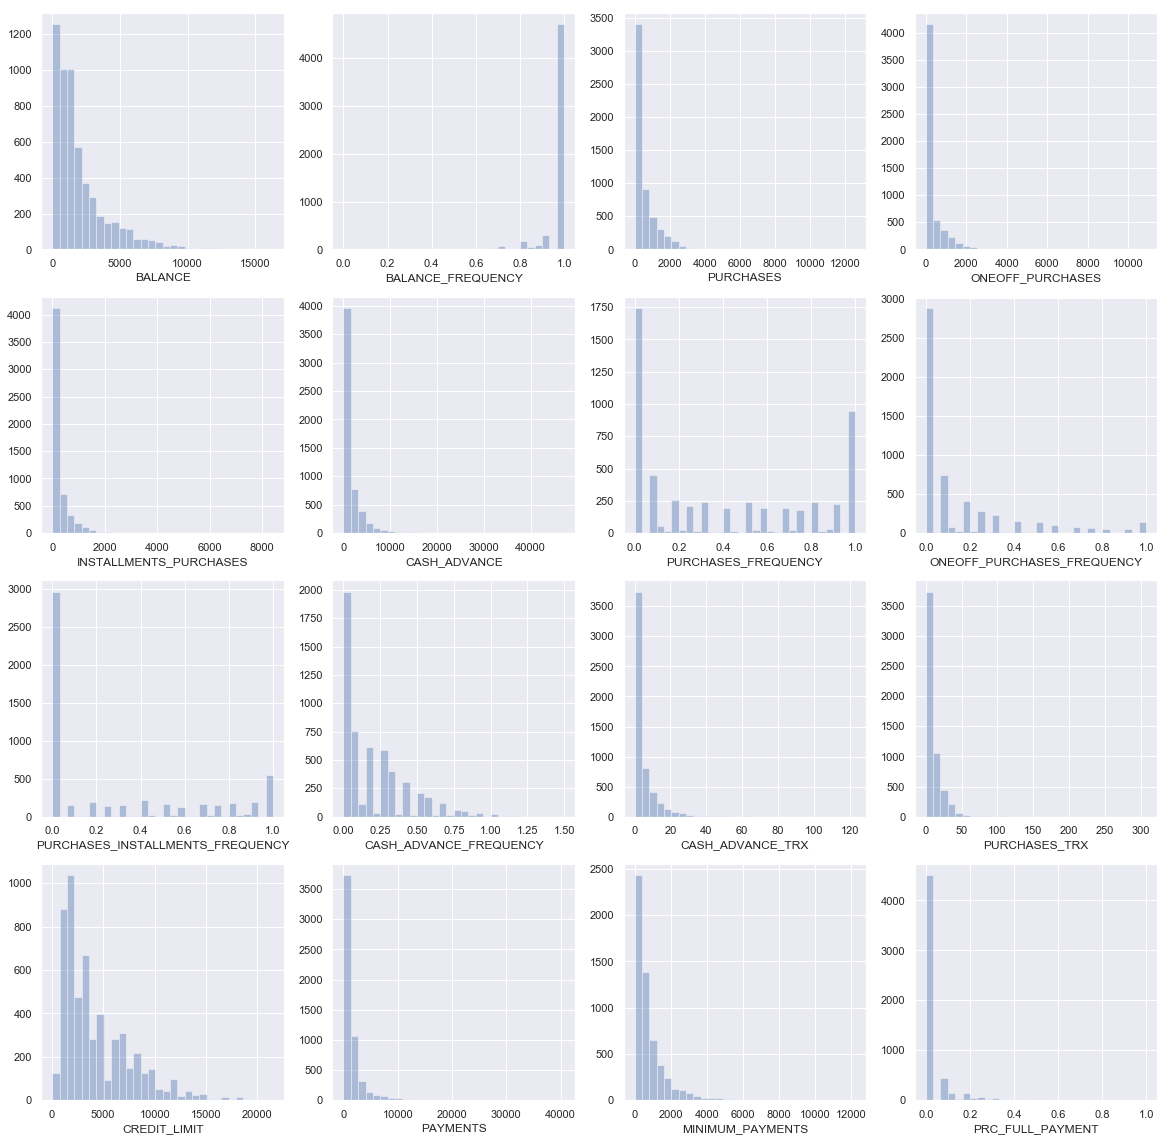

In [26]:
f, axes = plt.subplots(4, 4, figsize=(20, 20))
inx = 0;
for i in range(0,4):
    for j in range(0,4):
        sns.set(font_scale=1)
        sns.distplot(cc_df.iloc[index][column_plot[inx]],kde=False,bins=30,ax=axes[i, j])
        inx = inx + 1

In [27]:
cluster = 1
index = np.where(agg_clustering.labels_==cluster)
cc_df.iloc[index].shape

(2387, 18)

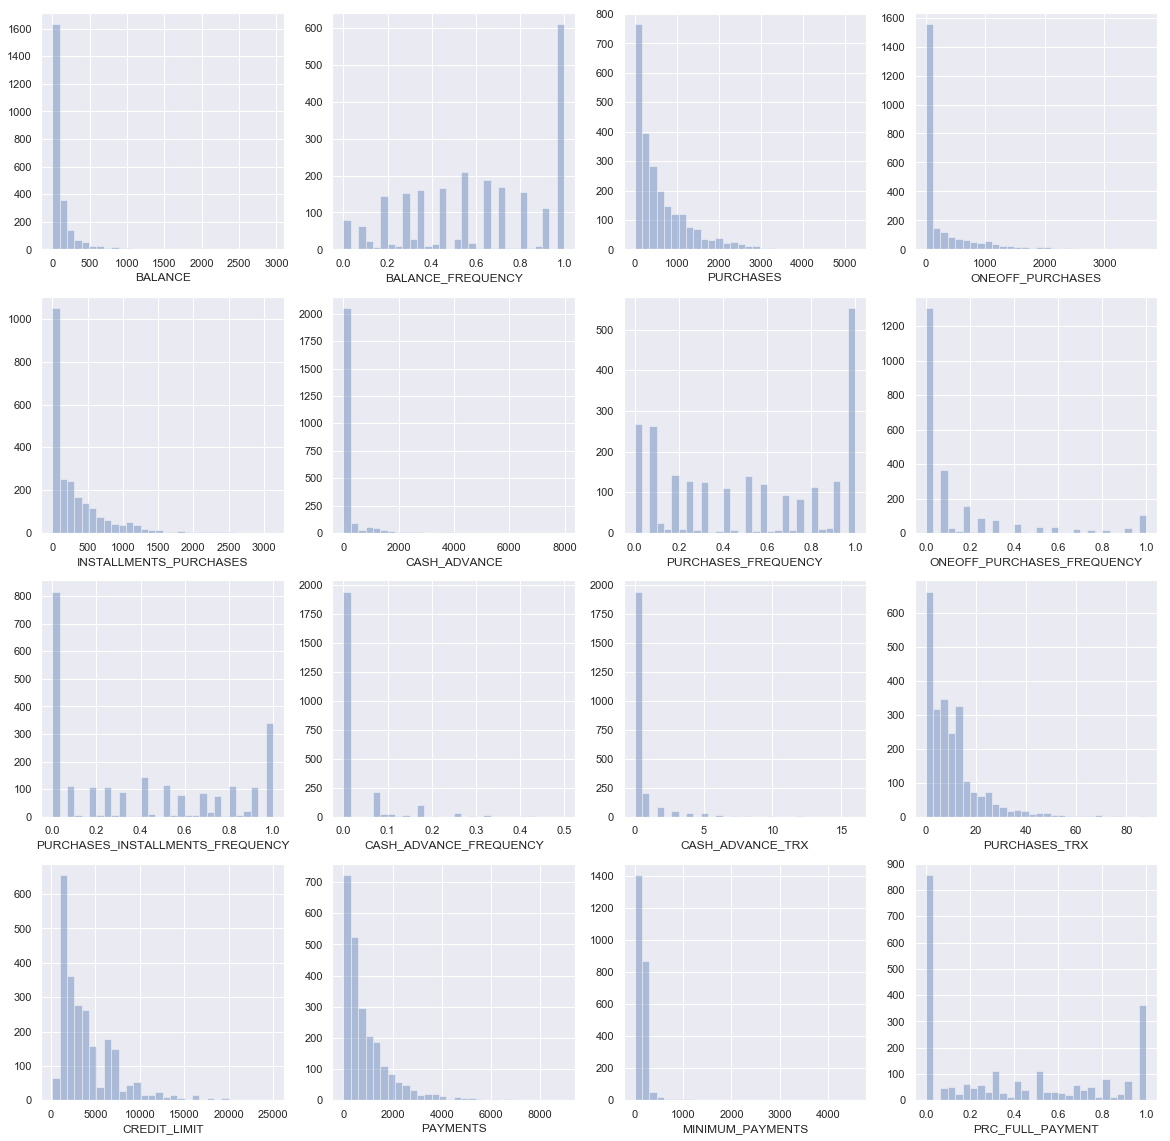

In [28]:
f, axes = plt.subplots(4, 4, figsize=(20, 20))
inx = 0;
for i in range(0,4):
    for j in range(0,4):
        sns.set(font_scale=1)
        sns.distplot(cc_df.iloc[index][column_plot[inx]],kde=False,bins=30,ax=axes[i, j])
        inx = inx + 1

In [29]:
cluster = 2
index = np.where(agg_clustering.labels_==cluster)
cc_df.iloc[index].shape

(101, 18)

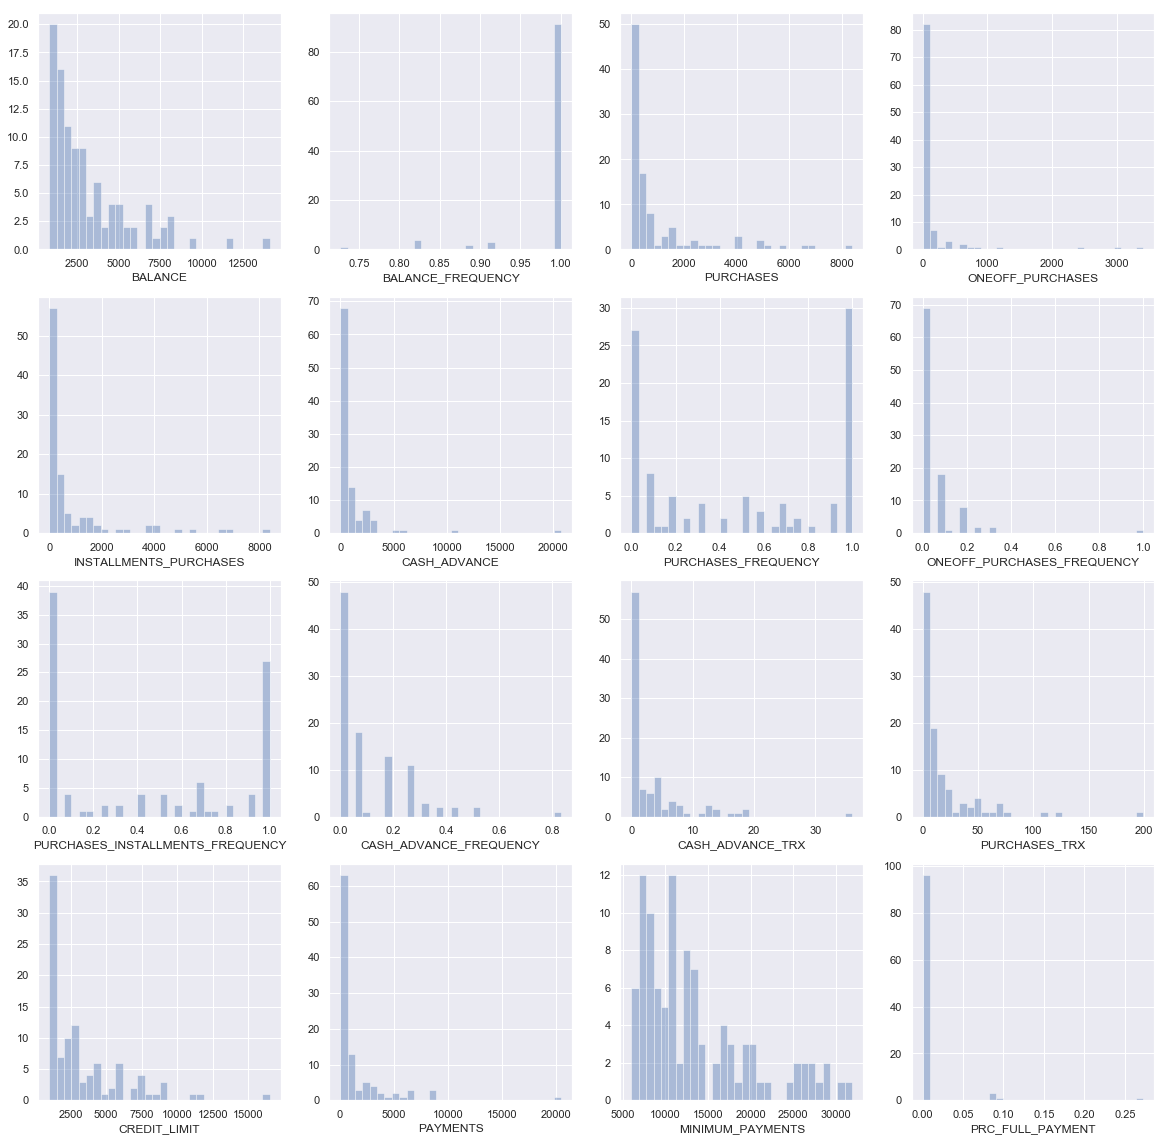

In [30]:
f, axes = plt.subplots(4, 4, figsize=(20, 20))
inx = 0;
for i in range(0,4):
    for j in range(0,4):
        sns.set(font_scale=1)
        sns.distplot(cc_df.iloc[index][column_plot[inx]],kde=False,bins=30,ax=axes[i, j])
        inx = inx + 1

In [31]:
cluster = 4
index = np.where(agg_clustering.labels_==cluster)
cc_df.iloc[index].shape

(879, 18)

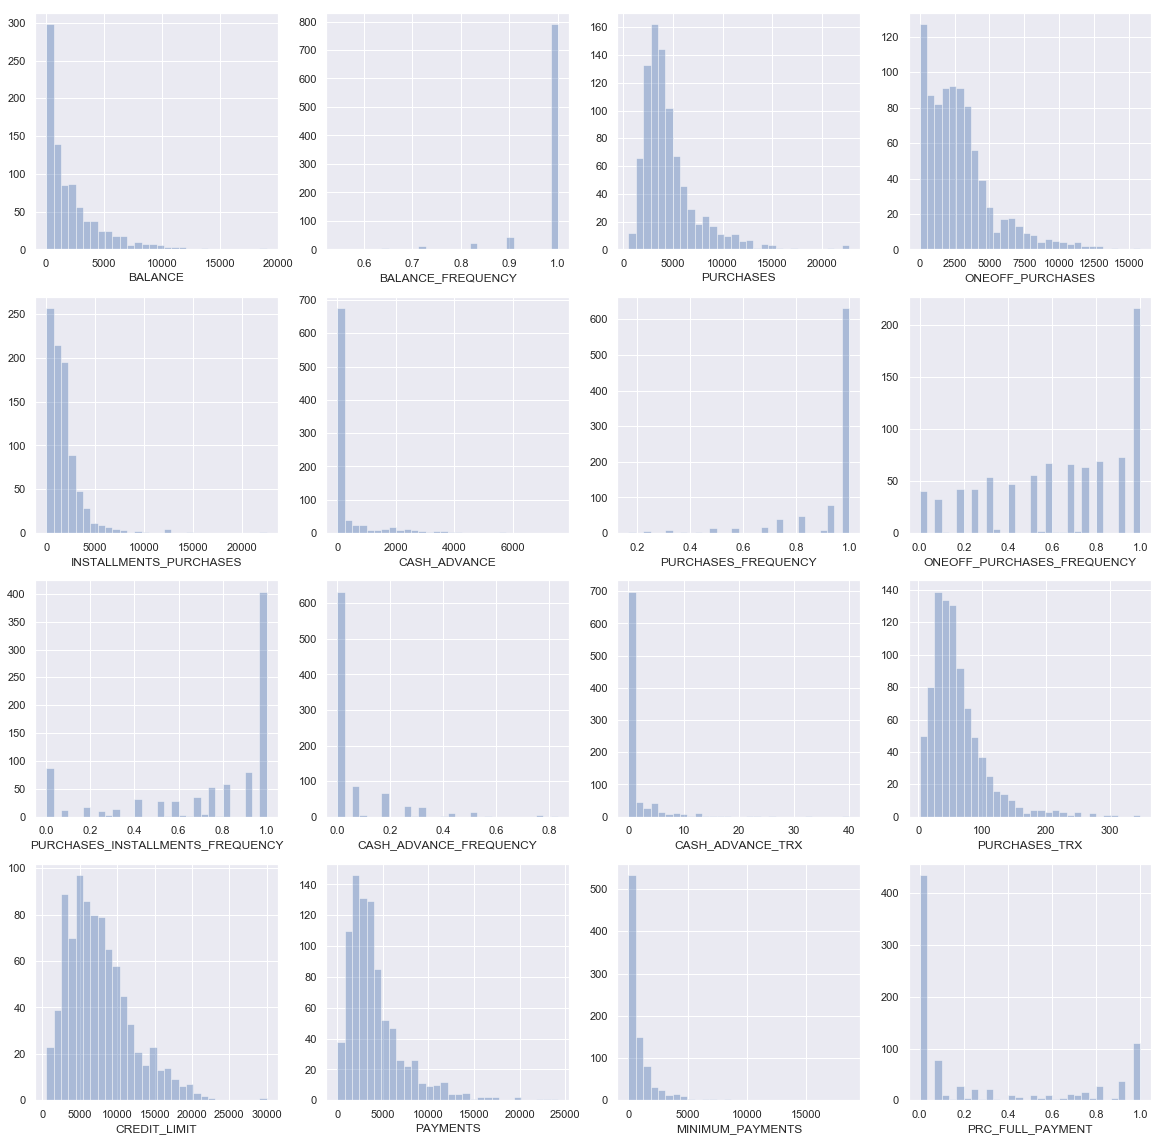

In [32]:
f, axes = plt.subplots(4, 4, figsize=(20, 20))
inx = 0;
for i in range(0,4):
    for j in range(0,4):
        sns.set(font_scale=1)
        sns.distplot(cc_df.iloc[index][column_plot[inx]],kde=False,bins=30,ax=axes[i, j])
        inx = inx + 1